# Классификация

## Наивная байсековская классификация

Набор моделей, которые предлагают быстрые и простыне алгоритмы классификации. В основе лежит формула Байеса

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

Мы ищем вероятность какой-либо метки при условии таких-то признаков, значит A - метка, B - признаки

Основная проблема вычислить P(B/A). Для этого используют генеративные модели. Сделаем наивное допущение относительной генреративной модели => отыщем грубое приближение для P(B/A).

### Гаусовский наивный байесековский классификатор
Допущение состоит в том, что данные всех категорий взяты из простого нормального распределения

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

GaussianNB()

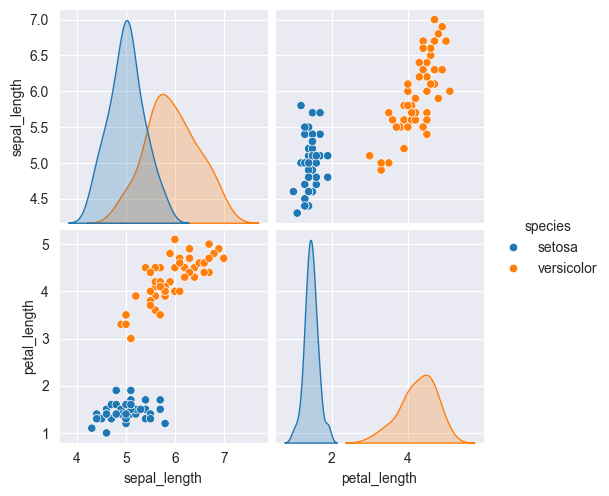

In [15]:
iris = sns.load_dataset('iris')
#print(iris.head)
#sns.pairplot(iris, hue='species')

data = iris[['sepal_length', 'petal_length', 'species']]

#setosa versicolor

data_df = data[(data['species']=='setosa') | (data['species']== 'versicolor')]
sns.pairplot(data_df, hue='species')
#print(data_df.shape)

X = data_df[['sepal_length', 'petal_length']]
Y = data_df['species']
model = GaussianNB()
model.fit(X, Y)
#setosa virginica

[5.006 1.462]
[0.121764 0.029556]
[5.936 4.26 ]
[0.261104 0.2164  ]
   sepal_length  petal_length species
0      4.300000           1.0  setosa
1      4.327273           1.0  setosa
2      4.354545           1.0  setosa
3      4.381818           1.0  setosa
4      4.409091           1.0  setosa


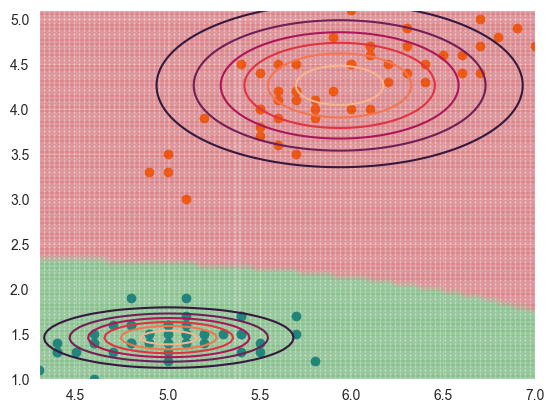

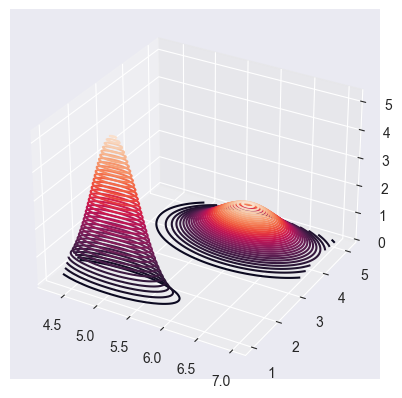

In [41]:
print(model.theta_[0])
print(model.var_[0])
print(model.theta_[1])
print(model.var_[1])

data_df_setosa = data_df[data_df['species'] == 'setosa']
data_df_versicolor = data_df[data_df['species'] == 'versicolor']

plt.scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)

X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])
X_p['species'] = model.predict(X_p)
print(X_p.head())
X_p_setosa = X_p[X_p['species'] == 'setosa']
X_p_versicolor = X_p[X_p['species'] == 'versicolor']

plt.scatter(X_p_setosa['sepal_length'], X_p_setosa['petal_length'], alpha=0.1)
plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.1)

#Нарисуем контур распределения
theta0 = (model.theta_[0])
var0 = (model.var_[0])
theta1 = (model.theta_[1])
var1 = (model.var_[1])

z1 = 1/(np.pi*(var0[0]*var0[1])**0.5)*np.exp(-0.5*(((X1_p - theta0[0])**2)/(var0[0]) + ((X2_p - theta0[1])**2)/(var0[1])))
z2 = 1/(np.pi*(var1[0]*var1[1])**0.5)*np.exp(-0.5*(((X1_p - theta1[0])**2)/(var1[0]) + ((X2_p - theta1[1])**2)/(var1[1])))

plt.contour(X1_p, X2_p, z1)
plt.contour(X1_p, X2_p, z2)
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1_p, X2_p, z1, 40)
ax.contour3D(X1_p, X2_p, z2, 40)

plt.show()

   sepal_length  petal_length     species
0      4.900000           3.0  versicolor
1      4.930303           3.0  versicolor
2      4.960606           3.0  versicolor
3      4.990909           3.0  versicolor
4      5.021212           3.0  versicolor


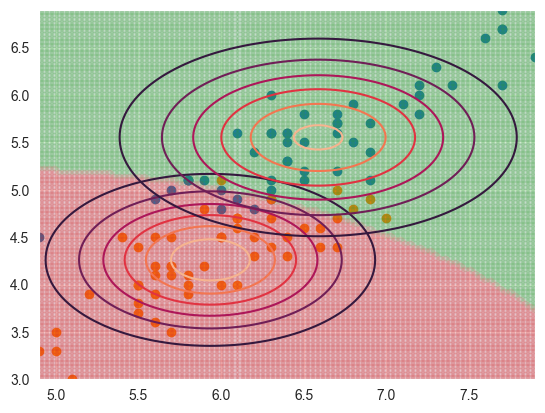

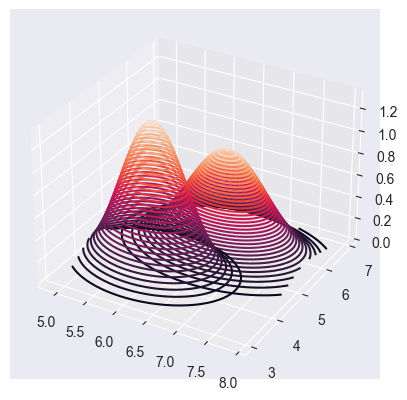

In [42]:
data_df = data[(data['species']=='virginica') | (data['species']== 'versicolor')]

X = data_df[['sepal_length', 'petal_length']]
Y = data_df['species']
model = GaussianNB()
model.fit(X, Y)

data_df_virginica = data_df[data_df['species'] == 'virginica']
data_df_versicolor = data_df[data_df['species'] == 'versicolor']

plt.scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)

X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])
X_p['species'] = model.predict(X_p)
print(X_p.head())
X_p_setosa = X_p[X_p['species'] == 'virginica']
X_p_versicolor = X_p[X_p['species'] == 'versicolor']

plt.scatter(X_p_setosa['sepal_length'], X_p_setosa['petal_length'], alpha=0.1)
plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.1)

#Нарисуем контур распределения
theta0 = (model.theta_[0])
var0 = (model.var_[0])
theta1 = (model.theta_[1])
var1 = (model.var_[1])

z1 = 1/(np.pi*(var0[0]*var0[1])**0.5)*np.exp(-0.5*(((X1_p - theta0[0])**2)/(var0[0]) + ((X2_p - theta0[1])**2)/(var0[1])))
z2 = 1/(np.pi*(var1[0]*var1[1])**0.5)*np.exp(-0.5*(((X1_p - theta1[0])**2)/(var1[0]) + ((X2_p - theta1[1])**2)/(var1[1])))

plt.contour(X1_p, X2_p, z1)
plt.contour(X1_p, X2_p, z2)
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1_p, X2_p, z1, 40)
ax.contour3D(X1_p, X2_p, z2, 40)

plt.show()